# Loan Project - Classification

***
**Importing the required libraries & packages**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pyodbc
from math import sqrt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

**Changing The Default Working Directory Path**

In [2]:
os.chdir('C:\\Users\\Shridhar\\Desktop\\Loan Project')

## Data Reading:

**Processed the input data using Structured Query Language _(SQL)_ and done some cleaning, with the help of <span style = 'background : green'><span style = 'color : white'> pyodbc </span> </span> package connecting Jupyter Notebook with SQL Server in the following 3 cells.**

In [3]:
server = 'SHRIDHAR\SQLEXPRESS'
db = 'LoanProject'

In [4]:
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+db+';UID=Shri; PWD=12345678;Trusted connection=YES')

In [5]:
sql = 'select * from acc_ord_card_disp_client_dist aocdcd join loan_trans lt on lt.account_id= aocdcd.disposition_account_id'

**Reading the SQL File using Pandas Command**

In [6]:
df = pd.read_sql(sql,conn)

**Exporting the Data after processing in SQL, the final data is converted to Comma Seperated Values _(CSV)_ File**

In [7]:
df.to_csv('Loan Final Data.csv',index = False)

## Exploratory Data Analysis:

**Checking the Null values of all the columns in the dataset.**

In [8]:
df.isna().sum()

card_id                     0
disp_id                     0
type                        0
issued                      0
disposition_account_id      0
disposition_client_id       0
disposition_type            0
client_id                   0
birth_number                0
district_id                 0
A1                          0
A2                          0
A3                          0
A4                          0
A5                          0
A6                          0
A7                          0
A8                          0
A9                          0
A10                         0
A11                         0
A12                         0
A13                         0
A14                         0
A15                         0
A16                         0
order_id                    0
bank_to                     0
account_to                  0
amount                      0
k_symbol                    0
account_date                0
account_district_id         0
account_fr

**Checking the dataset whether it's having duplicate values or not**

In [9]:
df.duplicated().sum()

0

**Getting to describe the numerical columns of the dataset**

In [10]:
df.describe()

,card_id,disp_id,disposition_account_id,disposition_client_id,client_id,birth_number,district_id,A1,A4,A5,...,account_district_id,trans_id,account_id,amount,balance,account,loan_id,loan_amount,loan_duration,loan_payments
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,8.680000e+02,868.000000,...,868.000000,8.680000e+02,868.000000,868.000000,868.000000,2.050000e+02,868.000000,868.000000,868.000000,868.000000
mean,907.690092,8139.987327,6767.154378,8265.955069,8265.955069,685696.934332,37.332949,37.332949,1.407953e+05,41.294931,...,39.427419,2.276811e+06,6767.154378,13533.202650,51020.558765,3.346704e+07,6374.570276,124083.428571,27.069124,4954.557604
std,238.683175,3244.507382,2715.120458,3376.937067,3376.937067,149850.689100,23.864496,23.864496,1.281183e+05,23.132398,...,25.833877,9.593156e+05,2715.120458,15346.995182,28746.846180,3.115044e+07,561.596458,74014.846356,16.620600,2019.525078
min,159.000000,946.000000,790.000000,946.000000,946.000000,351003.000000,1.000000,1.000000,5.131300e+04,0.000000,...,1.000000,2.320620e+05,790.000000,5.400000,200.000000,0.000000e+00,5126.000000,14628.000000,12.000000,1177.000000
25%,844.000000,6567.000000,5442.000000,6567.000000,6567.000000,570929.000000,14.000000,14.000000,8.651300e+04,21.000000,...,12.000000,1.602809e+06,5442.000000,306.224991,31045.900391,7.772154e+06,6112.000000,78939.000000,12.000000,3222.000000
50%,857.000000,6789.000000,5622.000000,6789.000000,6789.000000,780907.000000,32.000000,32.000000,1.050580e+05,34.000000,...,45.000000,1.852832e+06,5622.000000,7000.000000,47310.150391,2.417564e+07,6150.000000,105804.000000,24.000000,4579.000000
75%,1100.000000,11101.000000,9265.000000,11409.000000,11409.000000,790326.000000,57.000000,57.000000,1.619540e+05,65.000000,...,62.000000,3.314625e+06,9265.000000,22933.750000,67505.726562,6.987126e+07,6888.000000,174744.000000,36.000000,6918.000000
max,1223.000000,13231.000000,11013.000000,13539.000000,13539.000000,805502.000000,74.000000,74.000000,1.204953e+06,98.000000,...,74.000000,3.675971e+06,11013.000000,63366.000000,143605.703125,9.867897e+07,7240.000000,331560.000000,60.000000,7281.000000


**Finding the shape of the dataset**

In [11]:
df.shape

(868, 50)

**Since it has many columns, to extract the columns we need getting all the column names. So, that we can identify the necessary column**

In [12]:
df.columns

Index(['card_id', 'disp_id', 'type', 'issued', 'disposition_account_id',
       'disposition_client_id', 'disposition_type', 'client_id',
       'birth_number', 'district_id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'order_id',
       'bank_to', 'account_to', 'amount', 'k_symbol', 'account_date',
       'account_district_id', 'account_frequency', 'trans_id', 'account_id',
       'date', 'type', 'operation', 'amount', 'balance', 'k_symbol', 'bank',
       'account', 'loan_id', 'loan_date', 'loan_amount', 'loan_duration',
       'loan_payments', 'loan_status'],
      dtype='object')

## Data Cleaning:

**Checking the value counts for the `loan_status` column from the dataset.**

In [13]:
df['loan_status'].value_counts()

A    648
B    168
C     51
D      1
Name: loan_status, dtype: int64

**Label Encoding the `loan_status` column using mapping function**

In [14]:
df['loan_status']=df['loan_status'].map({'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3})

**After Label Encoding , checking the values to verify there's no missing arguments in the `loan_status` column**

In [15]:
df.groupby('loan_status').size()

loan_status
0    648
1    168
2     51
3      1
dtype: int64

## Data Visualization:

**Plotting the bar graph with `loan_status` and `loan_duration` and saving the png file**

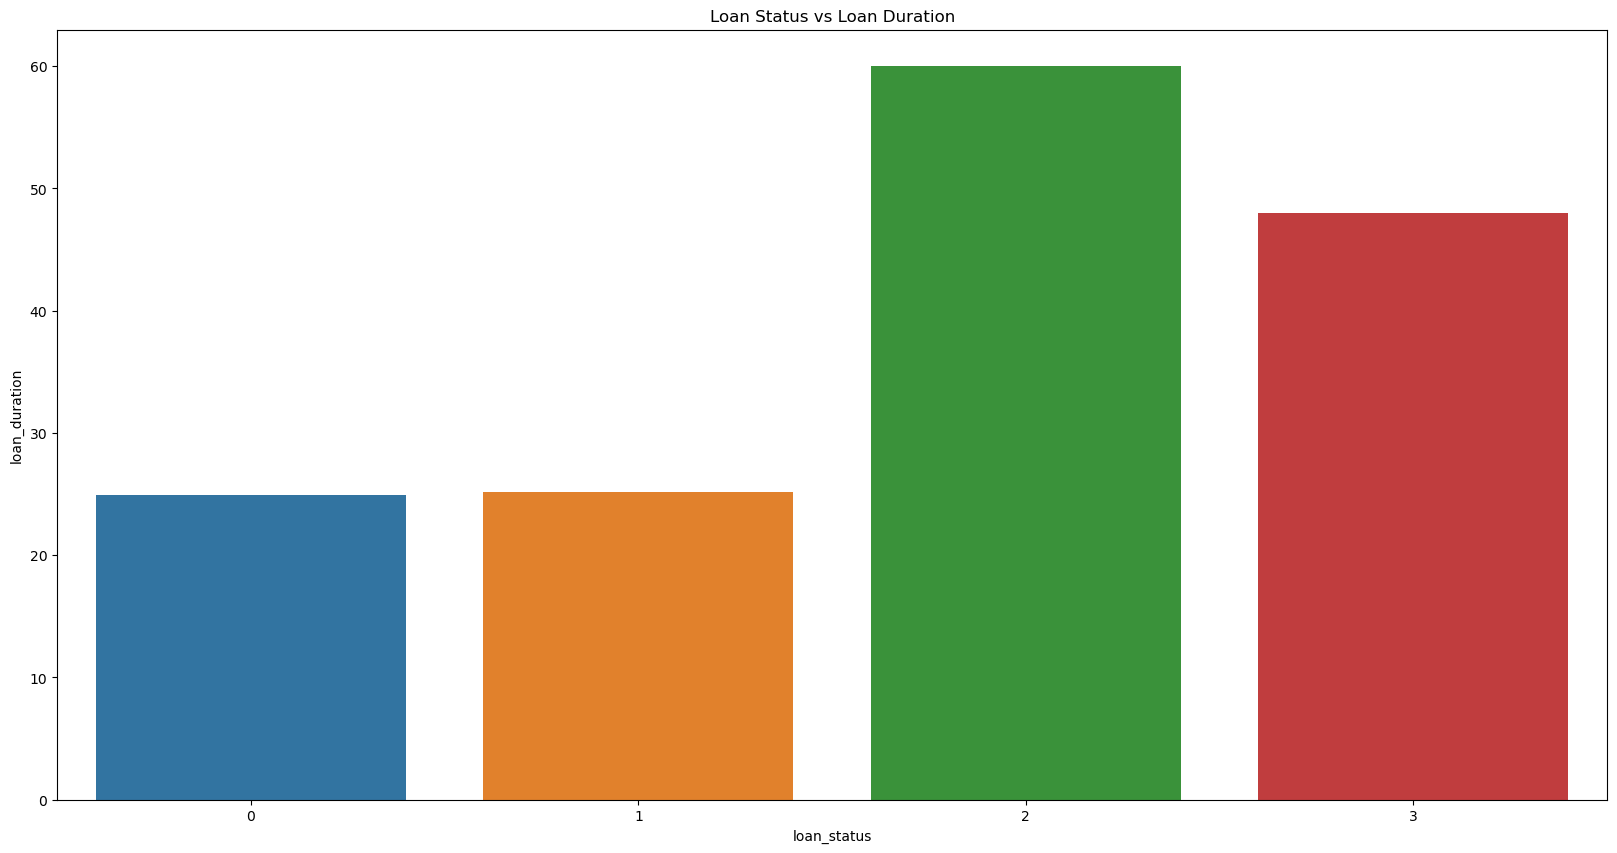

In [16]:
plt.rcParams['figure.figsize']=20,10
sns.barplot(x= 'loan_status', y = 'loan_duration' ,data = df, ci = None)
plt.title('Loan Status vs Loan Duration')
plt.savefig('Loan Status vs Loan Duration.png')
plt.show()

**Plotting the bar graph with `loan_status` and `loan_amount` and saving the png file**

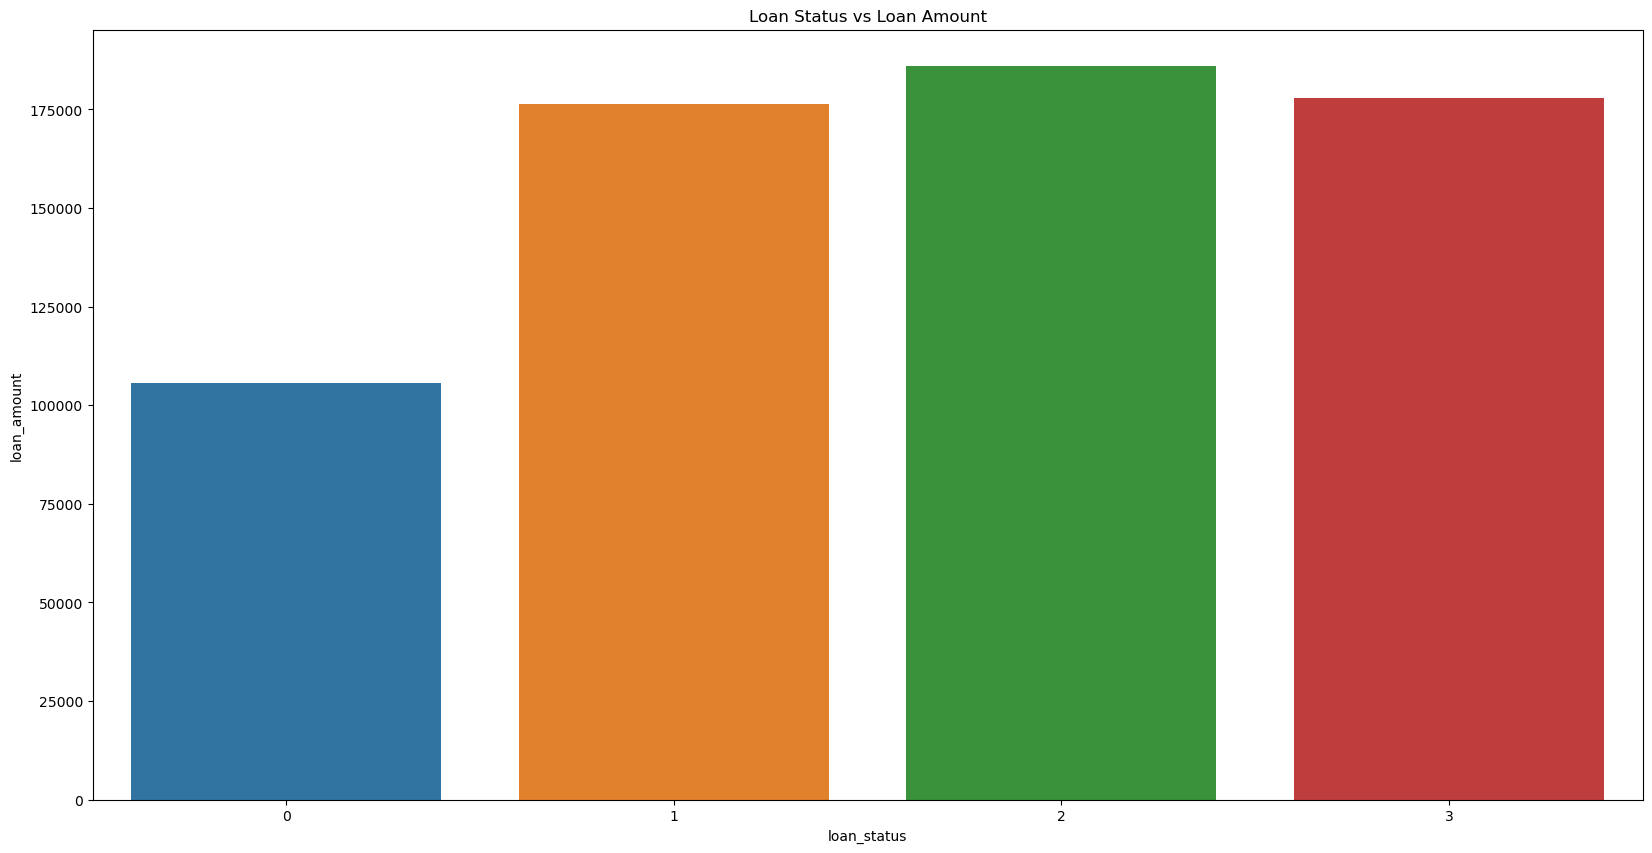

In [17]:
sns.barplot(x= 'loan_status', y = 'loan_amount' ,data = df, ci = None)
plt.title('Loan Status vs Loan Amount')
plt.savefig('Loan Status vs Loan Amount.png')
plt.show()

**Plotting the Bar Graph with count of customers based on the `loan_duration` and confirm that there are no null values and identify all unique values from the `loan_duration` and saving the PNG File**

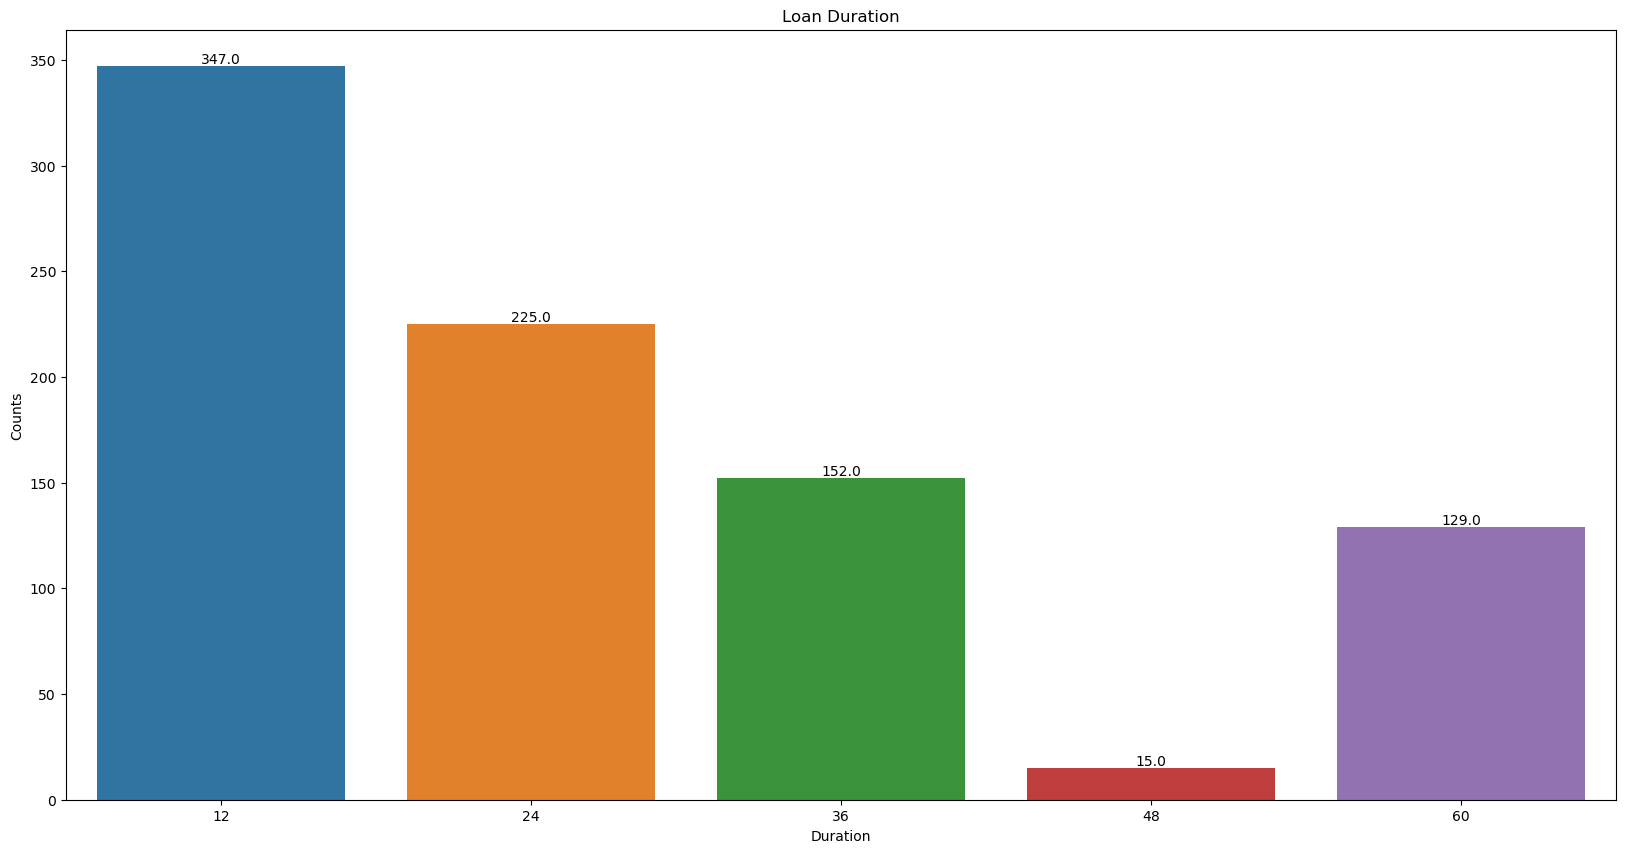

In [18]:
Duration = df['loan_duration'].value_counts()
plot = sns.barplot(x = Duration.index, y = Duration.values, data = df)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Loan Duration')
plt.xlabel('Duration')
plt.ylabel('Counts')
plt.savefig('Loan Duration.png')
plt.show()

**Getting the Correlation Values from the needed columns from the dataset using Seaborn Heatmap & saving the PNG File**

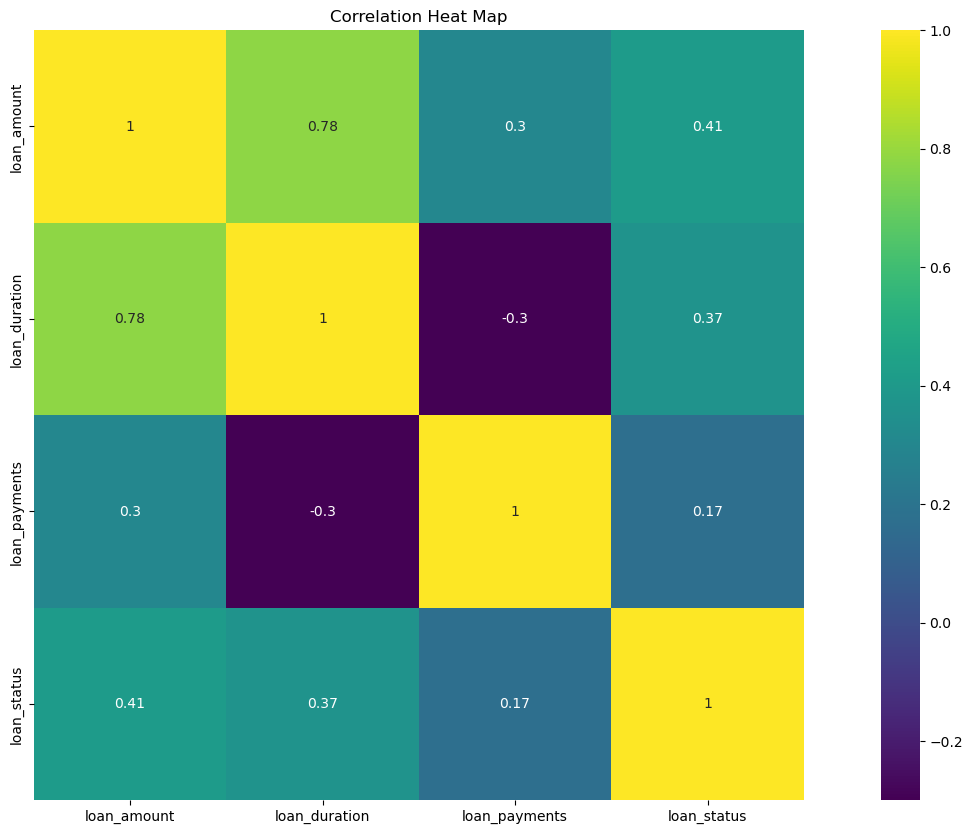

In [19]:
cor = df.iloc[:,46:50].corr()
sns.heatmap(cor, cmap = 'viridis', cbar = True, annot = True, square = True)
plt.title('Correlation Heat Map')
plt.savefig('Correlation Heat Map.png')
plt.show()

**Assigning the dependent and independent variable**

In [20]:
x = df.iloc[:,46:49]
y = df.iloc[:,49]

## Data Preprocessing:

**Standardizing the independent variable of the dataset**

In [21]:
sc = StandardScaler()
x = sc.fit_transform(x)

## Model Fitting:

**Defining the Function for the ML algorithms using GridSearchCV Algorithm and Predicting the Dependent Variable by fitting the given model and create the pickle file of the model with the given Algo_name. Further getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Confusion Matrix and Classification Report between the predicted values and dependent test dataset**

In [22]:
def FitModel(x,y,algo_name,algorithm,GridSearchParams,cv):
    np.random.seed(10)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 51)
    grid = GridSearchCV(estimator = algorithm, param_grid = GridSearchParams, cv = cv,
                       scoring = 'accuracy', verbose = 0,n_jobs = -1)
    grid_result = grid.fit(x_train,y_train)
    pred = grid_result.predict(x_test)
    best_params = grid_result.best_params_
    pickle.dump(grid_result,open(algo_name,'wb'))
    print('Algorithm Name : ',algo_name,'\n')
    print('Best Params : ',best_params,'\n')
    print('Percentage of Accuracy Score : {} %'.format(100 * accuracy_score(y_test,pred)),'\n')
    print('Mean Absolute Error : ',mean_absolute_error(y_test,pred),'\n')
    print('Mean Squared Error : ',mean_squared_error(y_test,pred),'\n')
    print('Root Mean Squared Error : ',sqrt(mean_squared_error(y_test,pred)),'\n')
    print('Confusion Matrix : \n',confusion_matrix(y_test,pred),'\n')
    print('Classification Report : \n',classification_report(y_test,pred))

**Running the function with empty parameters since the Logistic Regression model doesn't need any special parameters and fitting the Logistic Regression Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Confusion Matrix and Classification Report between the predicted values and dependent test dataset and also the pickle file with the name Logistic Regression.**

In [23]:
param = {}
FitModel(x, y, 'Logistic Regression', LogisticRegression(), param, cv = 10)

Algorithm Name :  Logistic Regression 

Best Params :  {} 

Percentage of Accuracy Score : 98.27586206896551 % 

Mean Absolute Error :  0.017241379310344827 

Mean Squared Error :  0.017241379310344827 

Root Mean Squared Error :  0.13130643285972254 

Confusion Matrix : 
 [[125   2   0]
 [  1  29   0]
 [  0   0  17]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       127
           1       0.94      0.97      0.95        30
           2       1.00      1.00      1.00        17

    accuracy                           0.98       174
   macro avg       0.98      0.98      0.98       174
weighted avg       0.98      0.98      0.98       174



**Running the function with some appropriate parameters and fitting the Decision Tree Classifier Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Confusion Matrix and Classification Report between the predicted values and dependent test dataset and also the pickle file with the name Decision Tree.**

In [24]:
params = {'criterion' :['entropy','gini'],
          'max_depth' :[1,2,3,4],
          'max_features' :['auto','sqrt'],
          'min_samples_split' :[5,6,7,8],
          'min_samples_leaf' :[9,10,11,12]}
FitModel(x, y, 'Decision Tree', DecisionTreeClassifier(), params, cv =10)

Algorithm Name :  Decision Tree 

Best Params :  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7} 

Percentage of Accuracy Score : 98.85057471264368 % 

Mean Absolute Error :  0.017241379310344827 

Mean Squared Error :  0.028735632183908046 

Root Mean Squared Error :  0.1695158759052026 

Confusion Matrix : 
 [[126   0   1]
 [  1  29   0]
 [  0   0  17]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       127
           1       1.00      0.97      0.98        30
           2       0.94      1.00      0.97        17

    accuracy                           0.99       174
   macro avg       0.98      0.99      0.98       174
weighted avg       0.99      0.99      0.99       174



**Running the function with some appropriate parameters and fitting the Random Forest Classifier Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Confusion Matrix and Classification Report between the predicted values and dependent test dataset and also the pickle file with the name Random Forest.**

In [25]:
params = {'n_estimators' :[111,222,333,444],
          'criterion' :['entropy','gini'],
          'max_depth': [4], 
          'max_features': ['auto'], 
          'min_samples_leaf': [11], 
          'min_samples_split': [6]}
FitModel(x, y, 'Random Forest', RandomForestClassifier(), params, cv =10)

Algorithm Name :  Random Forest 

Best Params :  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 11, 'min_samples_split': 6, 'n_estimators': 111} 

Percentage of Accuracy Score : 99.42528735632183 % 

Mean Absolute Error :  0.005747126436781609 

Mean Squared Error :  0.005747126436781609 

Root Mean Squared Error :  0.07580980435789034 

Confusion Matrix : 
 [[127   0   0]
 [  1  29   0]
 [  0   0  17]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       127
           1       1.00      0.97      0.98        30
           2       1.00      1.00      1.00        17

    accuracy                           0.99       174
   macro avg       1.00      0.99      0.99       174
weighted avg       0.99      0.99      0.99       174



**Running the function with some appropriate parameters and fitting the KNeighbors Classifier Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Confusion Matrix and Classification Report between the predicted values and dependent test dataset and also the pickle file with the name KNeighbors.**

In [26]:
params = {'n_neighbors' :[3,5,7,10,13]}
FitModel(x, y, 'KNeighbors', KNeighborsClassifier(), params, cv =10)

Algorithm Name :  KNeighbors 

Best Params :  {'n_neighbors': 3} 

Percentage of Accuracy Score : 99.42528735632183 % 

Mean Absolute Error :  0.005747126436781609 

Mean Squared Error :  0.005747126436781609 

Root Mean Squared Error :  0.07580980435789034 

Confusion Matrix : 
 [[126   1   0]
 [  0  30   0]
 [  0   0  17]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       127
           1       0.97      1.00      0.98        30
           2       1.00      1.00      1.00        17

    accuracy                           0.99       174
   macro avg       0.99      1.00      0.99       174
weighted avg       0.99      0.99      0.99       174



**Running the function with some appropriate parameters and fitting the Support Vector Machine Classifier Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Confusion Matrix and Classification Report between the predicted values and dependent test dataset and also the pickle file with the name SVC.**

In [27]:
params = {'C' : [0.1,1,100,1000],
          'gamma' :[0.001,0.01,0.1,1]}
FitModel (x, y,'SVC', SVC(), params, cv =10)

Algorithm Name :  SVC 

Best Params :  {'C': 1, 'gamma': 1} 

Percentage of Accuracy Score : 99.42528735632183 % 

Mean Absolute Error :  0.005747126436781609 

Mean Squared Error :  0.005747126436781609 

Root Mean Squared Error :  0.07580980435789034 

Confusion Matrix : 
 [[126   1   0]
 [  0  30   0]
 [  0   0  17]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       127
           1       0.97      1.00      0.98        30
           2       1.00      1.00      1.00        17

    accuracy                           0.99       174
   macro avg       0.99      1.00      0.99       174
weighted avg       0.99      0.99      0.99       174



**Running the function with some appropriate parameters and fitting the XGBoost Classifier Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Confusion Matrix and Classification Report between the predicted values and dependent test dataset and also the pickle file with the name XGBoost.**

In [28]:
params = {'n_estimators' :[111,222,333,444]}
FitModel (x, y,'XGBoost', XGBClassifier(), params, cv = 10)

Algorithm Name :  XGBoost 

Best Params :  {'n_estimators': 111} 

Percentage of Accuracy Score : 100.0 % 

Mean Absolute Error :  0.0 

Mean Squared Error :  0.0 

Root Mean Squared Error :  0.0 

Confusion Matrix : 
 [[127   0   0]
 [  0  30   0]
 [  0   0  17]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        17

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



**Running the function with some appropriate parameters and fitting the CatBoost Classifier Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Confusion Matrix and Classification Report between the predicted values and dependent test dataset and also the pickle file with the name CatBoost.**

In [29]:
params = {'verbose' :[0]}
FitModel(x, y, 'CatBoost', CatBoostClassifier(), params , cv = 10)

Algorithm Name :  CatBoost 

Best Params :  {'verbose': 0} 

Percentage of Accuracy Score : 100.0 % 

Mean Absolute Error :  0.0 

Mean Squared Error :  0.0 

Root Mean Squared Error :  0.0 

Confusion Matrix : 
 [[127   0   0]
 [  0  30   0]
 [  0   0  17]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        17

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



**Running the function with empty parameters since the Light GBM Classifier model doesn't need any special parameters and fitting the Light GBM Classifier Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Confusion Matrix and Classification Report between the predicted values and dependent test dataset and also the pickle file with the name Light GBM.**

In [30]:
param = {}
FitModel(x, y, 'Light GBM', LGBMClassifier(), param, cv=10)

Algorithm Name :  Light GBM 

Best Params :  {} 

Percentage of Accuracy Score : 99.42528735632183 % 

Mean Absolute Error :  0.005747126436781609 

Mean Squared Error :  0.005747126436781609 

Root Mean Squared Error :  0.07580980435789034 

Confusion Matrix : 
 [[126   1   0]
 [  0  30   0]
 [  0   0  17]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       127
           1       0.97      1.00      0.98        30
           2       1.00      1.00      1.00        17

    accuracy                           0.99       174
   macro avg       0.99      1.00      0.99       174
weighted avg       0.99      0.99      0.99       174



## Model Testing: 

**Loading the pickle file with the algorithm which gives highest accuracy score**

In [31]:
model = pickle.load(open('XGBoost','rb'))

**Predicting the dependent variable of the whole data using the loaded pickle file and getting the Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Confusion Matrix and Classification Report between the predicted values and dependent dataset**

In [32]:
fpred = model.predict(x)
print('Percentage of Accuracy Score : {} %'.format(100 * accuracy_score(y,fpred)),'\n')
print('Mean Absolute Error : ',mean_absolute_error(y,fpred),'\n')
print('Mean Squared Error : ',mean_squared_error(y,fpred),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(y,fpred)),'\n')
print('Confusion Matrix : \n',confusion_matrix(y,fpred),'\n')
print('Classification Report : \n',classification_report(y,fpred))

Percentage of Accuracy Score : 100.0 % 

Mean Absolute Error :  0.0 

Mean Squared Error :  0.0 

Root Mean Squared Error :  0.0 

Confusion Matrix : 
 [[648   0   0   0]
 [  0 168   0   0]
 [  0   0  51   0]
 [  0   0   0   1]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00         1

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



**Making the Predicted value as a new dataframe with new column name as `Predicted Loan Status (Approx.)` and concating it with the original data, so that we can able to compare the differences between Predicted Loan Status and Original Loan Status.**

In [33]:
prediction = pd.DataFrame(fpred,columns = ['Predicted Loan Status(Approx.)'])
pred_df = pd.concat([df,prediction],axis = 1)

**Exporting the data with Predicted Loan Status to a Comma Seperated Value _(CSV)_ file**

In [34]:
pred_df.to_csv('Predicted Loan Status Data.csv',index = False)